# CS231a PSET 2

You can use this colab notebook to write your code in, which could save you the trouble of having to set up Python or installing packages.

## Câu 1: TÍnh toán Ma trận cơ bản (Fundamental Matrix) từ các điểm tương ứng (30 điểm)
Bài tập này liên quan đến việc tính toán ma trânj cơ bản từ các điểm tương ứng. Trong bài tập này, bạn sẽ cài đặt cả phiên bản binhf phương tối thiểu tuyến tính của thuật toán 8 điểm và phiên bản chuẩn hóa của nó để tính toán các ma trận cơ bản.

***(a) Cài đặt thuật toán 8 điểm bình phương tối thiểu tuyến trính trong \texttt{lls_eight_point_alg()}. Nhớ áp dụng ràng buộc rank 2 qua phân tích trị riêng. Beo gồm ma trận cơ bản kết quả của bạn và mô tả cách cài đặt của bạn trong báo cáo bài viết của bạn (15 điểm code + 5 điểm viết)***


Như chúng ta đã biết, ma trận F là ma trận 3x3 thõa:

\begin{align*}
    \begin{bmatrix}
        u & v & 1
    \end{bmatrix} \begin{bmatrix}
        f_{11} & f_{12} & f_{13} \\
        f_{21} & f_{22} & f_{23} \\
        f_{31} & f_{32} & f_{33}
    \end{bmatrix} \begin{bmatrix}
        u' \\
        v' \\
        1
    \end{bmatrix} &= 0 \\
    \Leftrightarrow     u u' f_{11} + u v' f_{12} + u f_{13} + v u' f_{21} + v v' f_{22} + v f_{23} + u' f_{31} + v' f_{32} + f_{33} &= 0 \\
    \begin{bmatrix}
        u u' & u v' & u & v u' & v v' & v & u' & v' & 1
    \end{bmatrix} \begin{bmatrix}
        f_{11} & \\_{12} \\ \cdots \\ f_{32} \\ f_{33}
    \end{bmatrix} & = 0 \\
    \begin{bmatrix}
        u ( u' v' 1) & v (u' v' 1) & (u' v' 1)
    \end{bmatrix}  \begin{bmatrix}
        f_{11} & \\_{12} \\ \cdots \\ f_{32} \\ f_{33}
    \end{bmatrix} & = 0
\end{align*}

Vì phương trình này sẽ có vô số nghiệm (F up-to-scale) nên là chúng ta sẽ ràng buôc $\|f\| = 1$ và chúng ta ta sẽ sử dụng SVD để xấp xỉ f.

Sau đó chúng ta tối ưu kết quả bằng cách đưa F về thành ma trận rank 2

\begin{align*}
    F = U \Sigma V^T
    \rightarrow \hat{F} = U \begin{bmatrix}
        \Sigma_1 & 0 & 0 \\
        0 & \Sigma_2 & 0 \\
        0 & 0 & 0
    \end{bmatrix} V^T
\end{align*}

***(b) [Câu hỏi Lập trình] Cài đặt thuật toán tám điểm chuẩn hóa trong normalized_eight_point_alg() và báo cáo ma trận cơ bản trả về. Nhớ áp dụng ràng buộc hạng hai cho ma trận cơ bản thông qua phân tích giá trị kỳ dị. [5 điểm]***

Yah, thì ở bài này chúng ta chỉ cần làm một việc duy nhất đó chính là chuẩn hóa các giá trị pixel mà thôi, còn tìm ma trận đã có hàm ở trên lo liệu cho chúng ta rồi nè!

Cùng nhắc lại một số kiến thức trong note:

Hệ số co giãn
\begin{align*}
    s = \big ( \frac{2 N}{\sum_{i = 1}^N \| x_i - \bar{x} \|^2} \big )^{1/2}
\end{align*}

Ma trận chuẩn hóa:
\begin{align*}
    T = \begin{bmatrix}
        s & 0 & -s \bar{x} \\
        0 & s & -s \bar{y} \\
        0 & 0 & 1
    \end{bmatrix}
\end{align*}

Xấp xỉ ma trận gốc:
\begin{align*}
    F = T_2^T F_q T_1
\end{align*}

***(c) [Câu hỏi Lập trình] Sau khi cài đặt các phương thức để xác định Ma trận Cơ bản, chúng ta có thể xác định các đường epipolar. Cụ thể để xác định độ chính xác của Ma trận Cơ bản của chúng ta, chúng ta sẽ tính khoảng cách trung bình giữa một điểm và đường epipolar tương ứng của nó trong compute_distance_to_epipolar_lines(). [5 điểm]***

Vẫn là recap thôi, công thức của đường eipolar của đường epipolar đi qua p mà có điểm p' trong ảnh khác là:

\begin{equation}
    l = F p'
\end{equation}


## Câu 2: Homographies Phù hợp cho Hiệu chỉnh Ảnh (23 điểm)
Tiếp tục từ bài tập trước, bài tập này nhằm hiệu chỉnh một cặp ảnh cho trước một vài điểm khớp. Nhiệm vụ chính trong hiệu chỉnh ảnh là tạo ra hai homographies H₁, H₂ biến đổi các ảnh theo cách mà các đường epipolar song song với trục ngang của ảnh. Bạn sẽ cài đặt các phương thức trong p2.py như sau:

***(a) [Câu hỏi Lập trình] Bước đầu tiên trong việc hiệu chỉnh một ảnh là xác định các epipole. Hoàn thành hàm compute_epipole(). Gợi ý: Nhớ lại rằng F^T e = 0, và cách bạn có thể sử dụng SVD để giải cho e. [3 điểm]***

Ayza, bài này nhìn vậy nhưng mà trong note giảng không kỹ lắm nên chúng ta biến đổi xíu nhé!

Đầu tiên ta biết epipole là điểm mà tất cả epipolar line đi qua. Và có công thức của các đường thẳng như sau:

\begin{equation}
    l = F p'
\end{equation}

Và epipole đi qua tất cả nên:

\begin{align*}
    \begin{vmatrix}
        l_1^T \\ l_2^T \\ \vdots \\ l_n^T
    \end{vmatrix} e &= 0 \\
    \Leftrightarrow {p'}^T F^T e &= 0 \\
    \Leftrightarrow F^T e &= 0 \text{ (Vì $p'$ bất kỳ)}
\end{align*}

***(b) [Câu hỏi Lập trình] Hãy giải cho homography H ánh xạ một epipole e đến một điểm trên trục ngang tại vô cực (f, 0, 0). Điều này ban đầu có vẻ phức tạp, nhưng nó chỉ là một chuỗi các bước tương đối đơn giản. Hoàn thành hàm compute_H(). [5 điểm]***

Hãy cứ từng bước như trong note nhé!

Ma trận T: Đưa (w/2, h/2, 1) -> (0, 0, 1)

\begin{equation}
    T = \begin{bmatrix}
        1 & 0 & -w/2 \\
        0 & 1 & -h/2 \\
        0 & 0 & 1
    \end{bmatrix}
\end{equation}

Ma trận R: Đưa e' = (e_1', e_2', 1) -> (f, 0, 1)

\begin{equation}
    R = \begin{bmatrix}
        \alpha \frac{e_1'}{\sqrt{e_1'^2 + e_2'^2}} & \alpha \frac{e_1'}{\sqrt{e_2'^2 + e_2'^2}} & 0 \\
        -\alpha \frac{e_2'}{\sqrt{e_1'^2 + e_2'^2}} & -\alpha \frac{e_1'}{\sqrt{e_1'^2 + e_2'^2}} & 0 \\
        0 & 0 & 1
    \end{bmatrix}
\end{equation}

Ma trận G: Đưa (f, 0, 1) về (f, 0, 0)
\begin{equation}
    G = \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        -\frac{1}{f} & 0 & 1
    \end{bmatrix}
\end{equation}

Vậy \begin{equation} H_2 = T^{-1} G R T \end{equation}

***(c) [Câu hỏi Lập trình] Bây giờ đến phần khó hơn - tìm một cặp homographies phù hợp H₁ và H₂ bằng cách cài đặt compute_matching_homographies(). [10 điểm]***

Okay, chinh chiến luôn mấy câu khó nhắn này nào!

Đầu tiên chúng ta đã có ma trận $H_2$, ma trận đưa epipole về (f, 0, 0) để đưa tất cả epipolar line song song với nhau thay vì giao nhau tại epipole.

Để tìm $H_1$, chúng ta cố gắng tìm $H_1$ sao cho:

\begin{equation}
    argmin_{H_1} \sum_i \|H_1 p_{1i} - H_2 p_{2i} \|^2
\end{equation}

Và theo note (chưa chứng minh) thì

\begin{equation}
    H_1 = H_A H_2 M
\end{equation}

Sao cho

<Claude 3.7 Extended>
\begin{align*}
    H_A &= \begin{bmatrix}
        a_1 & a_2 & a_3 \\
        0 & 1 & 0 \\
        0 & 0 & 1
    \end{bmatrix} \\
    M &= [e]_X F \\
\end{align*}

Đúng, bạn hiểu chính xác! Công thức $H_1 = H_A H_2 M$ thể hiện một chuỗi biến đổi như sau:

1. Đầu tiên áp dụng $M$ để đưa điểm từ camera 1 sang camera 2 (vì $M$ biến đổi $p_i$ thành xấp xỉ $p'_i$)
2. Sau đó áp dụng $H_2$ để "rectify" (chỉnh sửa) điểm đó trong không gian của camera 2
3. Cuối cùng áp dụng $H_A$ để đưa điểm đã được rectify từ camera 2 trở về camera 1

Đây chính là quy trình "roundtrip" (đi vòng quay trở lại): từ camera 1 → camera 2 → rectify ở camera 2 → trở lại camera 1 với các điểm đã được chỉnh sửa.

Cách này cho phép tận dụng homography $H_2$ đã tính được từ trước, và tìm một homography $H_1$ tương ứng cho camera 1 sao cho hai camera "nhìn" cùng một mặt phẳng đích sau khi áp dụng các biến đổi tương ứng.

</Claude 3.7 Extended>

Còn lý do vì sao $H_A$ có dạng kiểu vậy là vì $y, z$ không đổi nữa mà chỉ còn x đổi!!!

***(d) Bao gồm cặp ảnh đã hiệu chỉnh trong báo cáo viết của bạn. Bình luận ngắn gọn về lý do tại sao hiệu chỉnh làm cho việc tìm các điểm tương ứng trong hai ảnh dễ dàng hơn. [5 điểm]***

- Đơn giản hóa tìm kiếm tương ứng: Sau khi hiệu chỉnh, các đường epipolar trở thành đường ngang có cùn tọa độ y trong cả 2 ảnh. Điều này có nghĩa là việc tìm kiếm điểm tương ứng được giới hạn trên cungf một dòng ngang thay vì phải tìm kiếm toàn bộ ảnh
- Giảm không gian tìm kiếm: Thay vì phải tìm kiếm điểm tương ứng trong không gian 2D, bài toán được giảm xuống tìm kiếm trong không gian 1D (chỉ dọc theo đường ngang)
- Tối ưu hóa cho các thuật toán stereo sau này: Nhiều thuật toán tính độ sâu stereo được thiế kế với giả định rằng các ảnh đã được rectifying
- Quan hệ đơn giản giữa các tọa độ
- Cải thiện độ chính xác và hiệu suất

## Câu 3: Phương pháp Factorization (15 điểm)
Trong câu hỏi này, bạn sẽ khám phá phương pháp factorization, ban đầu được trình bày bởi Tomasi và Kanade, để giải quyết bài toán cấu trúc affine từ chuyển động. Bạn sẽ cài đặt các phương thức trong p2.py và hoàn thành những điều sau:

***(a) Cài đặt phương pháp factorization như được mô tả trong bài giảng và trong ghi chú khóa học. Hoàn thành hàm factorization_method(). Mô tả ngắn gọn cách cài đặt của bạn trong báo cáo viết của bạn. [8 điểm code + 2 điểm viết]***

Phương pháp này thì rất đơn giản thôi nhưng đôi khi nó cũng không được hiệu quả (vì nhiều assumption)

Như note thì chúng ta sẽ chuẩn hóa các điểm:
\begin{equation}
    \hat{x_{ij}} = x_{ij} - \bar{x_i}
\end{equation}

Sau đó concatenate nhiều điểm của nhiều camera!
\begin{equation}
    D = \begin{bmatrix}
        \hat{x_{11}} & \cdots & \hat{x_{1n}} \\
        \vdots & & \vdots \\
        \hat{x_{n1}} & \cdots & \hat{x_{nn}}
    \end{bmatrix}
\end{equation}

Dung SVD để phân tách ma trận D thành ma trận M mà S
\begin{align*}
    D &= U \Sigma V^T \\
       &= \begin{bmatrix}
             | & | & | & \cdots \\
             u_1 & u_2 & u_3 & \cdots \\
             | & | & | & \cdots
        \end{bmatrix} \begin{bmatrix}
            \sigma_1 & 0 & 0 & \cdots \\
            0 & \sigma_2 & 0 & \cdots \\
            0 & 0 & \sigma_3 & \cdots \\
            \vdots & \vdots & \vdots
        \end{bmatrix} \begin{bmatrix}
           - & v_1^T & - \\
           - & v_2^T & - \\
           - & v_3^T & - \\
           - & \vdots & -
        \end{bmatrix} \\
        &= U_3 \sigma_3 V_3^T
        &= M S
\end{align*}

***(b) Chạy mã đã cung cấp vẽ các điểm 3D kết quả. So sánh kết quả của bạn với ground truth đã cung cấp. Kết quả nên trông giống hệt nhau, ngoại trừ việc tỷ lệ và xoay. Giải thích tại sao điều này xảy ra. [5 điểm]***

Umm, Câu này được giảng trong note luôn

\begin{equation}
    D = M S = (M H^{-1}) (H S) = M' S'
\end{equation}

Nên sẽ có rất nhiều S (Structure) ứng với mỗi M (Motion)

***(c) Tùy chọn: Báo cáo 4 giá trị kỳ dị từ phân tích SVD. Tại sao có 4 giá trị kỳ dị khác không? Bạn mong đợi có bao nhiêu giá trị kỳ dị khác không trong phiên bản lý tưởng hóa của phương pháp, và tại sao? [0 điểm]***

``
[959.5852216  540.47613178 184.43174791  27.9151956 ]
``

``
[264.54396508 210.06072009   7.21921783   5.12857709]
``

Như phân tích thì có 4 giá trị riêng khác không! Chúng ta mong đợi có 3 trị riêng khác 0 thì ma trận $D$ có hạng là 3

- Do dữ liệu có nhiễu
- Mô hình camera affine chỉ là xấp xỉ của mô hình phối cảnh thực tế

***(d) Tùy chọn: Phần tiếp theo của mã sẽ chỉ tải một tập con của các điểm tương ứng ban đầu. So sánh kết quả mới của bạn với ground truth, và giải thích tại sao chúng không còn xuất hiện tương tự (nếu bạn xoay việc tái tạo, bạn có thể thấy các điểm không hoàn toàn chính xác). [0 điểm]***

Với ít điểm tương ứng hơn, phương pháp factorization trở nên kém ổn đỉnh hơn vì:
- Có ít thông tin để khắc phục nhiễu
- Có thể xuất hiện vấn đề thiếu các góc nhìn quan trọng
- Ma trận đo lường D có thể bị thiết chi tiết quan trọng về hình dạng 3D

***(e) Tùy chọn: Báo cáo các giá trị kỳ dị mới, và so sánh chúng với các giá trị kỳ dị mà bạn đã tìm thấy trước đó. Giải thích bất kỳ thay đổi chính nào. [0 điểm]***

- Tỷ lệ giữa $\sigma_3, \sigma_4$ nhỏ hơn
- Khi tỷ lệ này gần 1, việc cắt bỏ ở hạng 3 sẽ làm mất nhiều thông tin $\rightarrow$ tăng lỗi khi tái tạo.


## Câu 4: Triangulation trong Structure From Motion (32 điểm)
Structure from motion lấy cảm hứng từ khả năng của chúng ta để tìm hiểu về cấu trúc 3D trong môi trường xung quanh bằng cách di chuyển qua nó. Cho một chuỗi hình ảnh, chúng ta có thể đồng thời ước tính cả cấu trúc 3D và đường đi mà camera đã thực hiện. Trong bài tập này, bạn sẽ cài đặt các phần quan trọng của một framework structure from motion, ước tính cả R và T của các camera, cũng như tạo ra vị trí của các điểm trong không gian 3D. Nhớ lại rằng trong bài tập trước chúng ta đã triangulate các điểm giả định các biến đổi affine. Tuy nhiên, trong bài toán structure from motion thực tế, chúng ta giả định các biến đổi phép chiếu. Bằng cách làm bài tập này, bạn sẽ học cách giải quyết loại triangulation này. Trong Ghi chú Khóa học 4, chúng tôi đi sâu hơn về quá trình này. Bạn sẽ cài đặt các phương thức trong p4.py và hoàn thành những điều sau:

***(a) [Câu hỏi Lập trình] Cho các điểm tương ứng giữa các cặp ảnh, chúng ta tính toán các Ma trận Cơ bản và Ma trận Thiết yếu tương ứng. Cho Ma trận Thiết yếu, chúng ta phải tính toán R và T giữa hai camera. Tuy nhiên, nhớ rằng có bốn cặp R, T có thể. Trong phần này, chúng ta tìm kiếm bốn cặp có thể này, mà sau đó chúng ta sẽ có thể quyết định giữa chúng. Cài đặt điều này trong hàm estimate_initial_RT(). [5 điểm]***

Câu này chỉ đơn giản là viết lại công thức thôi hehe với ma trận $E$ biết trước.

Ta dùng SVD tách ma trận $E$ thành $U D V^T$
thì ma trận R và vecto t là:

\begin{align*}
    R = U W V^T \\
    R = U W^T V^T \\
    t = \pm U_3
\end{align*}

***(b) [Câu hỏi Lập trình] Để phân biệt cặp R, T chính xác, trước tiên chúng ta phải biết cách tìm điểm 3D cho trước các điểm tương ứng khớp trong các ảnh khác nhau. Cài đặt ước tính tuyến tính của điểm 3D này trong linear_estimate_3d_point(). [5 điểm]***

Như trong bài giảng thì chúng ta sẽ xây dựng ma trận A:

$$
    A = \begin{bmatrix}
        x_i M_3 - M_1 \\
        y_i M_3 - M_2 \\
        \vdots \\
        x_n M_3 - M_1 \\
        y_n M_3 - M_2
    \end{bmatrix}
$$

sao cho $A P = 0$ . Ở đây chỉ việc sử dụng SVD nữa thui hehe!

***(c) [Câu hỏi Lập trình] Tuy nhiên, chúng ta có thể làm tốt hơn các ước tính tuyến tính, nhưng thường điều này thuộc về một số tối ưu hóa phi tuyến lặp lại. Để thực hiện loại tối ưu hóa này, chúng ta cần một số dư. Một cái đơn giản là lỗi tái chiếu của các điểm tương ứng. Điền vào các phương thức reprojection_error() và jacobian(), tính toán lỗi tái chiếu và Jacobian cho một điểm 3D và danh sách ảnh của nó. [5 điểm]***

Yah, một bài đạo hàm ma trận đầu tiên trong khóa học hehe! Let's go

Để dễ dàng trong đạo hàm ma trận thì các bạn nên tách nhỏ các bước làm:

Đầu tiên chúng ta có

$$
    \begin{bmatrix}
        u \\ v \\ w
    \end{bmatrix} = \begin{bmatrix}
        m_{11} & m_{12} & m_{13} & m_{14} \\
        m_{21} & m_{22} & m_{23} & m_{24} \\
        m_{31} & m_{32} & m_{33} & m_{34} \\
        m_{41} & m_{42} & m_{43} & m_{44}
    \end{bmatrix} \begin{bmatrix}
        X \\ Y \\ Z \\ 1
    \end{bmatrix}
$$

Sau đó là:

$$
    \begin{bmatrix}
        x \\ y
    \end{bmatrix} = \begin{bmatrix}
        \frac{u}{w} \\ \frac{v}{w}
    \end{bmatrix}
$$

<img src="data/img.png">

Yah và giờ chỉ cần implement lại mà thôi!]

***(d) [Câu hỏi Lập trình] Cài đặt thuật toán Gauss-Newton, tìm một xấp xỉ cho điểm 3D giảm thiểu lỗi tái chiếu này. Cài đặt thuật toán Gauss-Newton để tìm một ước tính cải thiện của điểm 3D trong hàm nonlinear_estimate_3d_point(). [6 điểm]***

Về cơ bản thì câu này chỉ là nhớ tiến trình và code lại công thức thôi nên các bạn xem code nhé!

***(e) [Câu hỏi Lập trình] Bây giờ cuối cùng, quay lại và phân biệt cặp R, T chính xác từ phần (a) bằng cách cài đặt phương thức estimate_RT_from_E(). [6 điểm]***

- Bước 1: Tìm ra 4 cặp R, t có thể
- Bước 2: Ứng với mỗi cặp R, t
    - Duyệt qua từng điểm
        - Tính ma trận M1. M2 (M2 dựa vào R, t)
        - Tìm điểm 3D trong Camera 1.
    - Nếu điểm đó ở hai camera đều có z dương thì +1 vào biến count
    - R, t nào có nhiều điểm có z dương nhất thì chọn
- Bước 3: Return R, t

# Problem 1: Fundamental Matrix Estimation From Point Correspondences

Make sure you have run the code block above and have access to the data for this problem. Now, you can fill out the logic for this problem. Once done, copy it to p1.py for submission to Gradescope.

--------------------------------------------------------------------------------
Set: data/set1
--------------------------------------------------------------------------------
Fundamental Matrix from LLS  8-point algorithm:
 [[ 1.55218081e-06 -8.18161523e-06 -1.50440111e-03]
 [-5.86997052e-06 -3.02892219e-07 -1.13607605e-02]
 [-3.52312036e-03  1.41453881e-02  9.99828068e-01]]
Distance to lines in image 1 for LLS: 25.162875800010667
Distance to lines in image 2 for LLS: 28.025662937501366
p'^T F p = 0.03568181885377042
Fundamental Matrix from normalized 8-point algorithm:
 [[ 7.69564303e-07 -6.28660670e-06  1.04182564e-04]
 [-5.78773950e-06 -4.01132413e-07 -7.58583623e-03]
 [-1.01011620e-03  1.04176782e-02  1.72255185e-01]]
Distance to lines in image 1 for normalized: 0.8286681346567999
Distance to lines in image 2 for normalized: 0.8905729362029162


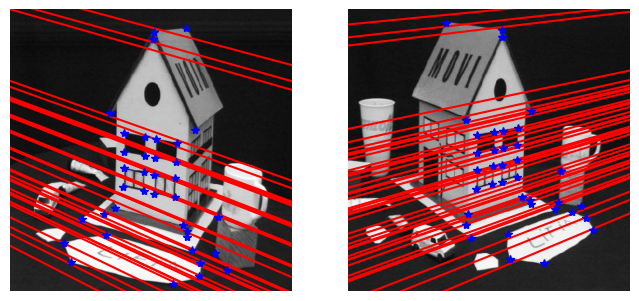

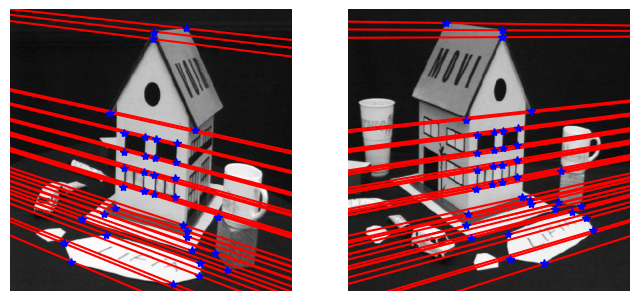

--------------------------------------------------------------------------------
Set: data/set2
--------------------------------------------------------------------------------
Fundamental Matrix from LLS  8-point algorithm:
 [[-5.63087200e-06  2.74976583e-05 -6.42650411e-03]
 [-2.77622828e-05 -6.74748522e-06  1.52182033e-02]
 [ 1.07623595e-02 -1.22519240e-02 -9.99730547e-01]]
Distance to lines in image 1 for LLS: 14.568227190514486
Distance to lines in image 2 for LLS: 9.701438829445713
p'^T F p = 0.03859522687863404
Fundamental Matrix from normalized 8-point algorithm:
 [[-1.76258641e-07  2.93495132e-06 -1.82141740e-04]
 [ 4.23387000e-06  3.75025436e-07  8.18992840e-03]
 [ 2.75815126e-04 -9.94284870e-03 -2.94298661e-03]]
Distance to lines in image 1 for normalized: 0.8917172367782481
Distance to lines in image 2 for normalized: 0.8894960616888692


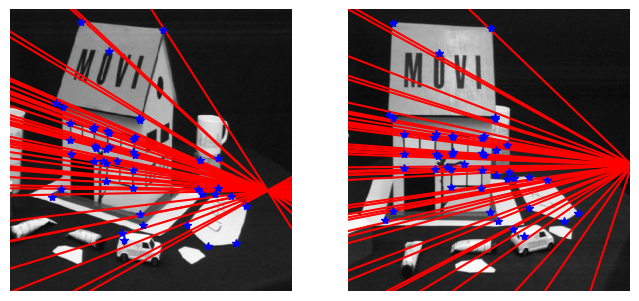

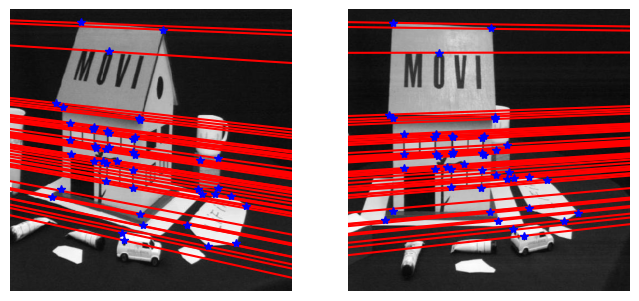

In [2]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from epipolar_utils import *
from p1 import *

'''
LLS_EIGHT_POINT_ALG  computes the fundamental matrix from matching points using 
linear least squares eight point algorithm
Arguments:
    points1 - N points in the first image that match with points2
    points2 - N points in the second image that match with points1

    Both points1 and points2 are from the get_data_from_txt_file() method
Returns:
    F - the fundamental matrix such that (points2)^T * F * points1 = 0
Please see lecture notes and slides to see how the linear least squares eight
point algorithm works
'''
if __name__ == '__main__':
    for im_set in ['data/set1', 'data/set2']:
        print('-'*80)
        print("Set:", im_set)
        print('-'*80)

        # Read in the data
        im1 = imread(im_set+'/image1.jpg')
        im2 = imread(im_set+'/image2.jpg')
        points1 = get_data_from_txt_file(im_set+'/pt_2D_1.txt')
        points2 = get_data_from_txt_file(im_set+'/pt_2D_2.txt')
        assert (points1.shape == points2.shape)

        # Running the linear least squares eight point algorithm
        F_lls = lls_eight_point_alg(points1, points2)
        print("Fundamental Matrix from LLS  8-point algorithm:\n", F_lls)
        print("Distance to lines in image 1 for LLS:", \
            compute_distance_to_epipolar_lines(points1, points2, F_lls))
        print("Distance to lines in image 2 for LLS:", \
            compute_distance_to_epipolar_lines(points2, points1, F_lls.T))

        # Running the normalized eight point algorithm
        F_normalized = normalized_eight_point_alg(points1, points2)

        pFp = [points2[i].dot(F_normalized.dot(points1[i])) 
            for i in range(points1.shape[0])]
        print("p'^T F p =", np.abs(pFp).max())
        print("Fundamental Matrix from normalized 8-point algorithm:\n", \
            F_normalized)
        print("Distance to lines in image 1 for normalized:", \
            compute_distance_to_epipolar_lines(points1, points2, F_normalized))
        print("Distance to lines in image 2 for normalized:", \
            compute_distance_to_epipolar_lines(points2, points1, F_normalized.T))

        # Plotting the epipolar lines
        plot_epipolar_lines_on_images(points1, points2, im1, im2, F_lls)
        plot_epipolar_lines_on_images(points1, points2, im1, im2, F_normalized)

        plt.show()


# Problem 2: Matching Homographies for Image Rectification

First, make sure you have access to the data. Then, complete this code and then copy it to p2.py for submission to Gradescope.

e1 [-1.30078593e+03 -1.42661359e+02  1.00000000e+00]
e2 [1.65422409e+03 4.54263026e+01 1.00000000e+00]
[ 1.39822409e+03 -2.10573697e+02  1.00000000e+00] Hoi cham
[1.41399147e+03 0.00000000e+00 1.00000000e+00] Cuu voi



C:\Users\admin\OneDrive - VNU-HCMUS\[PPH]_[ONLINE COURSE]\[PPH]_[CS231A]_[HOME WORK]\problem_sets_code\ps2\p2.py:93: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = np.linalg.lstsq(points1_hat, points2_hat[:,[0]])[0]


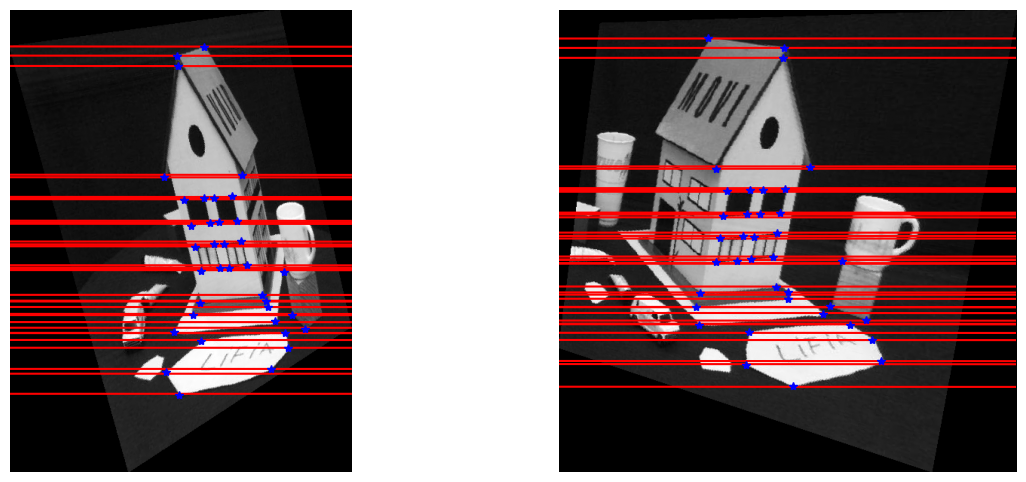

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from epipolar_utils import *
from p2 import *

if __name__ == '__main__':
    # Read in the data
    im_set = 'data/set1'
    im1 = imread(im_set+'/image1.jpg')
    im2 = imread(im_set+'/image2.jpg')
    points1 = get_data_from_txt_file(im_set+'/pt_2D_1.txt')
    points2 = get_data_from_txt_file(im_set+'/pt_2D_2.txt')
    assert (points1.shape == points2.shape)

    F = normalized_eight_point_alg(points1, points2)
    # F is such that such that (points2)^T * F * points1 = 0, so e1 is e' and e2 is e
    e1 = compute_epipole(F.T)
    e2 = compute_epipole(F)
    print("e1", e1)
    print("e2", e2)

    # Find the homographies needed to rectify the pair of images
    H1, H2 = compute_matching_homographies(e2, F, im2, points1, points2)
    print('')

    # Transforming the images by the homographies
    new_points1 = H1.dot(points1.T)
    new_points2 = H2.dot(points2.T)
    new_points1 /= new_points1[2,:]
    new_points2 /= new_points2[2,:]
    new_points1 = new_points1.T
    new_points2 = new_points2.T
    rectified_im1, offset1 = compute_rectified_image(im1, H1)
    rectified_im2, offset2 = compute_rectified_image(im2, H2)
    new_points1 -= offset1 + (0,)
    new_points2 -= offset2 + (0,)

    # Plotting the image
    F_new = normalized_eight_point_alg(new_points1, new_points2)
    plot_epipolar_lines_on_images(new_points1, new_points2, rectified_im1, rectified_im2, F_new)
    plt.show()


# Problem 3: The Factorization Method

First, make sure you have access to the data. Then, complete this code and then copy it to p3.py for submission to Gradescope.

(37, 3)
(4, 37)
[959.5852216  540.47613178 184.43174791  27.9151956 ]


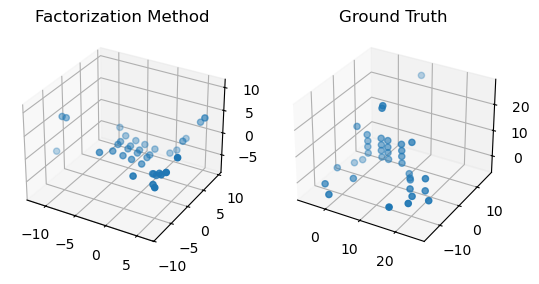

(30, 3)
(4, 30)
[943.57063046 440.11008862 168.86003443  26.5159858 ]


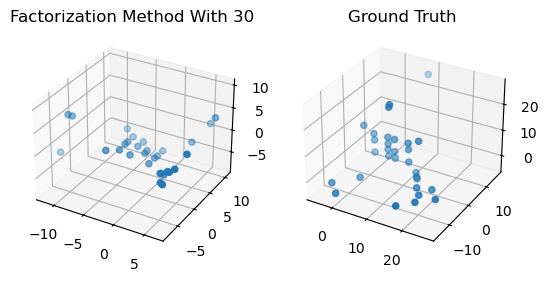

(20, 3)
(4, 20)
[734.81187742 355.9970341   96.96037322  24.64702741]


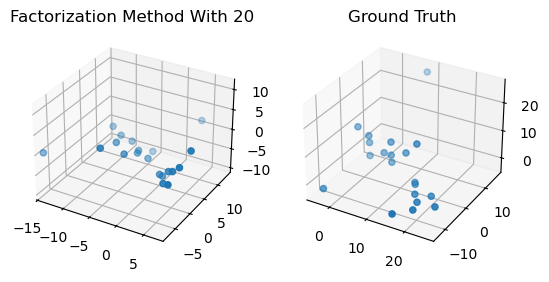

(10, 3)
(4, 10)
[454.94650102 234.28786376  52.75162264  13.53868185]


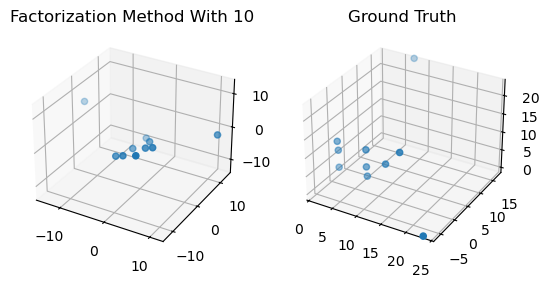

(16, 3)
(4, 16)
[625.9223838  343.59248969  76.59024544  18.12957379]


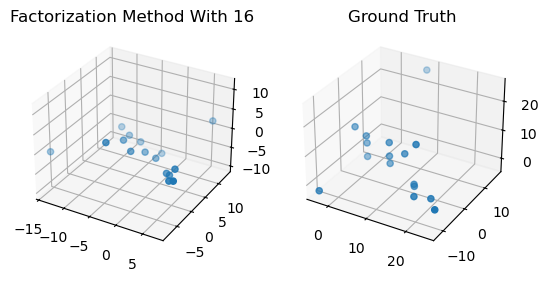

(18, 3)
(4, 18)
[264.54396508 210.06072009   7.21921783   5.12857709]


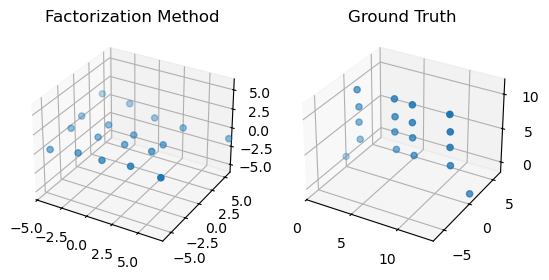

(18, 3)
(4, 18)
[264.54396508 210.06072009   7.21921783   5.12857709]


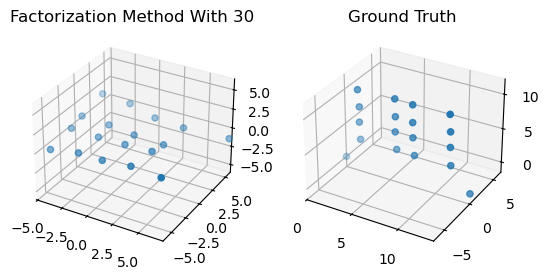

(18, 3)
(4, 18)
[264.54396508 210.06072009   7.21921783   5.12857709]


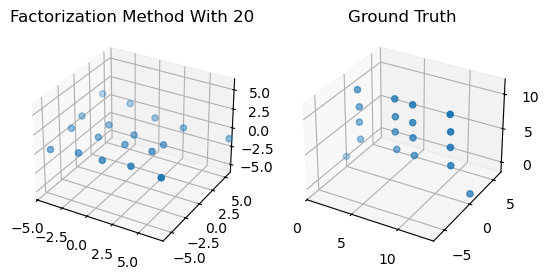

(10, 3)
(4, 10)
[214.41654327 128.78938818   5.90761779   2.66384698]


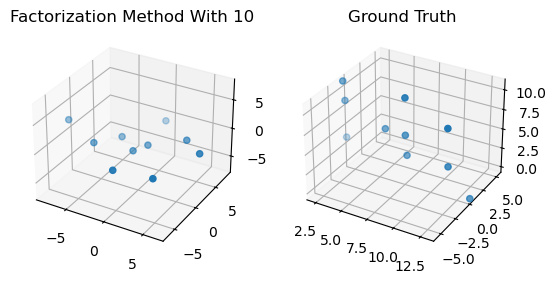

(16, 3)
(4, 16)
[261.91621499 200.31358167   7.16874955   4.81914481]


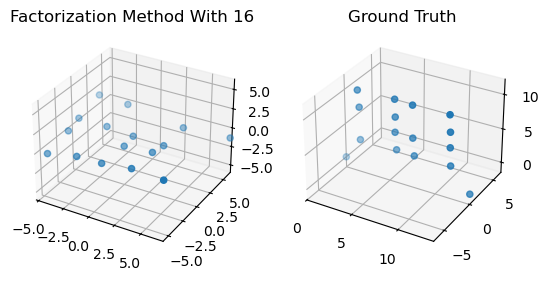

In [5]:
# PSET 2 Problem 3
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.io as sio
import matplotlib.gridspec as gridspec
from epipolar_utils import *
from p3 import *

if __name__ == '__main__':
    for im_set in ['data/set1', 'data/set1_subset']:
        # Read in the data
        im1 = imread(im_set+'/image1.jpg')
        im2 = imread(im_set+'/image2.jpg')
        points_im1 = get_data_from_txt_file(im_set + '/pt_2D_1.txt')
        points_im2 = get_data_from_txt_file(im_set + '/pt_2D_2.txt')
        points_3d = get_data_from_txt_file(im_set + '/pt_3D.txt')
        assert (points_im1.shape == points_im2.shape)

        # Run the Factorization Method
        structure, motion = factorization_method(points_im1, points_im2)

        # Plot the structure
        fig = plt.figure()
        ax = fig.add_subplot(121, projection = '3d')
        scatter_3D_axis_equal(structure[0,:], structure[1,:], structure[2,:], ax)
        ax.set_title('Factorization Method')
        ax = fig.add_subplot(122, projection = '3d')
        scatter_3D_axis_equal(points_3d[:,0], points_3d[:,1], points_3d[:,2], ax)
        ax.set_title('Ground Truth')

        plt.show()

        # With 30 points
        # Run the Factorization Method
        k = 30
        structure, motion = factorization_method(points_im1[:k], points_im2[:k])

        # Plot the structure
        fig = plt.figure()
        ax = fig.add_subplot(121, projection='3d')
        scatter_3D_axis_equal(structure[0, :], structure[1, :], structure[2, :], ax)
        ax.set_title(f'Factorization Method With {k}')
        ax = fig.add_subplot(122, projection='3d')
        scatter_3D_axis_equal(points_3d[:k, 0], points_3d[:k, 1], points_3d[:k, 2], ax)
        ax.set_title('Ground Truth')

        plt.show()

        k = 20
        structure, motion = factorization_method(points_im1[:k], points_im2[:k])

        # Plot the structure
        fig = plt.figure()
        ax = fig.add_subplot(121, projection='3d')
        scatter_3D_axis_equal(structure[0, :], structure[1, :], structure[2, :], ax)
        ax.set_title(f'Factorization Method With {k}')
        ax = fig.add_subplot(122, projection='3d')
        scatter_3D_axis_equal(points_3d[:k, 0], points_3d[:k, 1], points_3d[:k, 2], ax)
        ax.set_title('Ground Truth')

        plt.show()

        k = 10
        structure, motion = factorization_method(points_im1[:k], points_im2[:k])

        # Plot the structure
        fig = plt.figure()
        ax = fig.add_subplot(121, projection='3d')
        scatter_3D_axis_equal(structure[0, :], structure[1, :], structure[2, :], ax)
        ax.set_title(f'Factorization Method With {k}')
        ax = fig.add_subplot(122, projection='3d')
        scatter_3D_axis_equal(points_3d[:k, 0], points_3d[:k, 1], points_3d[:k, 2], ax)
        ax.set_title('Ground Truth')

        plt.show()

        k = 16
        structure, motion = factorization_method(points_im1[:k], points_im2[:k])

        # Plot the structure
        fig = plt.figure()
        ax = fig.add_subplot(121, projection='3d')
        scatter_3D_axis_equal(structure[0, :], structure[1, :], structure[2, :], ax)
        ax.set_title(f'Factorization Method With {k}')
        ax = fig.add_subplot(122, projection='3d')
        scatter_3D_axis_equal(points_3d[:k, 0], points_3d[:k, 1], points_3d[:k, 2], ax)
        ax.set_title('Ground Truth')

        plt.show()


# Problem 4: Triangulation in Structure From Motion

First, make sure you have access to the data. Then, complete this code and then copy it to p4.py for submission to Gradescope.

C:\Users\admin\AppData\Local\Temp\ipykernel_1676\1642964705.py:20: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  unit_test_camera_matrix = np.load('data/unit_test_camera_matrix.npy')
C:\Users\admin\AppData\Local\Temp\ipykernel_1676\1642964705.py:21: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  unit_test_image_matches = np.load('data/unit_test_image_matches.npy')
C:\Users\admin\AppData\Local\Temp\ipykernel_1676\1642964705.py:27: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  dense_matches = np.load(os.path.join(image_data_dir, 'dense_matches.npy'),


--------------------------------------------------------------------------------
Part A: Check your matrices against the example R,T
--------------------------------------------------------------------------------
Example RT:
 [[ 0.9736 -0.0988 -0.2056  0.9994]
 [ 0.1019  0.9948  0.0045 -0.0089]
 [ 0.2041 -0.0254  0.9786  0.0331]]

Estimated RT:
 [[[ 0.98305251 -0.11787055 -0.14040758  0.99941228]
  [-0.11925737 -0.99286228 -0.00147453 -0.00886961]
  [-0.13923158  0.01819418 -0.99009269  0.03311219]]

 [[ 0.98305251 -0.11787055 -0.14040758 -0.99941228]
  [-0.11925737 -0.99286228 -0.00147453  0.00886961]
  [-0.13923158  0.01819418 -0.99009269 -0.03311219]]

 [[ 0.97364135 -0.09878708 -0.20558119  0.99941228]
  [ 0.10189204  0.99478508  0.00454512 -0.00886961]
  [ 0.2040601  -0.02537241  0.97862951  0.03311219]]

 [[ 0.97364135 -0.09878708 -0.20558119 -0.99941228]
  [ 0.10189204  0.99478508  0.00454512  0.00886961]
  [ 0.2040601  -0.02537241  0.97862951 -0.03311219]]]
-------------------

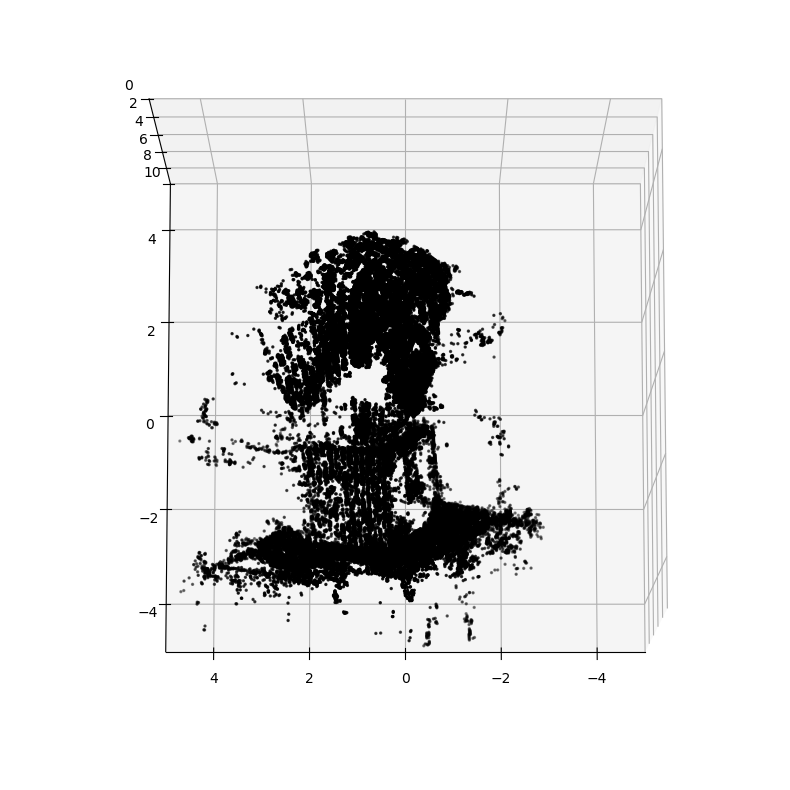

In [2]:
# PSET 2 Problem 4
import sys
import numpy as np
import os
from scipy.optimize import least_squares
import math
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.io import imread
from sfm_utils import *
from p4 import *
from mpl_toolkits.mplot3d import Axes3D

if __name__ == '__main__':
    run_pipeline = True

    # Load the data
    image_data_dir = 'data/statue/'
    unit_test_camera_matrix = np.load('data/unit_test_camera_matrix.npy')
    unit_test_image_matches = np.load('data/unit_test_image_matches.npy')
    image_paths = [os.path.join(image_data_dir, 'images', x) for x in
        sorted(os.listdir('data/statue/images')) if '.jpg' in x]
    focal_length = 719.5459
    matches_subset = np.load(os.path.join(image_data_dir,
        'matches_subset.npy'), allow_pickle=True, encoding='latin1')[0,:]
    dense_matches = np.load(os.path.join(image_data_dir, 'dense_matches.npy'), 
                               allow_pickle=True, encoding='latin1')
    fundamental_matrices = np.load(os.path.join(image_data_dir,
        'fundamental_matrices.npy'), allow_pickle=True, encoding='latin1')[0,:]

    # Part A: Computing the 4 initial R,T transformations from Essential Matrix
    print('-' * 80)
    print("Part A: Check your matrices against the example R,T")
    print('-' * 80)
    K = np.eye(3)
    K[0,0] = K[1,1] = focal_length
    E = K.T.dot(fundamental_matrices[0]).dot(K)
    im0 = imread(image_paths[0])
    im_height, im_width, _ = im0.shape
    example_RT = np.array([[0.9736, -0.0988, -0.2056, 0.9994],
        [0.1019, 0.9948, 0.0045, -0.0089],
        [0.2041, -0.0254, 0.9786, 0.0331]])
    print("Example RT:\n", example_RT)
    estimated_RT = estimate_initial_RT(E)
    print('')
    print("Estimated RT:\n", estimated_RT)

    # Part B: Determining the best linear estimate of a 3D point
    print('-' * 80)
    print('Part B: Check that the difference from expected point ')
    print('is near zero')
    print('-' * 80)
    camera_matrices = np.zeros((2, 3, 4))
    camera_matrices[0, :, :] = K.dot(np.hstack((np.eye(3), np.zeros((3,1)))))
    camera_matrices[1, :, :] = K.dot(example_RT)
    unit_test_matches = matches_subset[0][:,0].reshape(2,2)
    estimated_3d_point = linear_estimate_3d_point(unit_test_matches.copy(),
        camera_matrices.copy())
    expected_3d_point = np.array([0.6774, -1.1029, 4.6621])
    print("Difference: ", np.fabs(estimated_3d_point - expected_3d_point).sum())

    # Part C: Calculating the reprojection error and its Jacobian
    print('-' * 80)
    print('Part C: Check that the difference from expected error/Jacobian ')
    print('is near zero')
    print('-' * 80)
    estimated_error = reprojection_error(
            expected_3d_point, unit_test_matches, camera_matrices)
    estimated_jacobian = jacobian(expected_3d_point, camera_matrices)
    expected_error = np.array((-0.0095458, -0.5171407,  0.0059307,  0.501631))
    print("Error Difference: ", np.fabs(estimated_error - expected_error).sum())
    expected_jacobian = np.array([[ 154.33943931, 0., -22.42541691],
         [0., 154.33943931, 36.51165089],
         [141.87950588, -14.27738422, -56.20341644],
         [21.9792766, 149.50628901, 32.23425643]])
    print("Jacobian Difference: ", np.fabs(estimated_jacobian
        - expected_jacobian).sum())

    # Part D: Determining the best nonlinear estimate of a 3D point
    print('-' * 80)
    print('Part D: Check that the reprojection error from nonlinear method')
    print('is lower than linear method')
    print('-' * 80)
    estimated_3d_point_linear = linear_estimate_3d_point(
        unit_test_image_matches.copy(), unit_test_camera_matrix.copy())
    estimated_3d_point_nonlinear = nonlinear_estimate_3d_point(
        unit_test_image_matches.copy(), unit_test_camera_matrix.copy())
    error_linear = reprojection_error(
        estimated_3d_point_linear, unit_test_image_matches,
        unit_test_camera_matrix)
    print("Linear method error:", np.linalg.norm(error_linear))
    error_nonlinear = reprojection_error(
        estimated_3d_point_nonlinear, unit_test_image_matches,
        unit_test_camera_matrix)
    print("Nonlinear method error:", np.linalg.norm(error_nonlinear))

    # Part E: Determining the correct R, T from Essential Matrix
    print('-' * 80)
    print("Part E: Check your matrix against the example R,T")
    print('-' * 80)
    estimated_RT = estimate_RT_from_E(E,
        np.expand_dims(unit_test_image_matches[:2,:], axis=0), K)
    print("Example RT:\n", example_RT)
    print('')
    print("Estimated RT:\n", estimated_RT)

    # Part F: Run the entire Structure from Motion pipeline
    if not run_pipeline:
        sys.exit()
    print('-' * 80)
    print('Part F: Run the entire SFM pipeline')
    print('-' * 80)
    frames = [0] * (len(image_paths) - 1)
    for i in range(len(image_paths)-1):
        frames[i] = Frame(matches_subset[i].T, focal_length,
                fundamental_matrices[i], im_width, im_height)
        bundle_adjustment(frames[i])
    merged_frame = merge_all_frames(frames)

    # Construct the dense matching
    camera_matrices = np.zeros((2,3,4))
    dense_structure = np.zeros((0,3))
    for i in range(len(frames)-1):
        matches = dense_matches[i]
        camera_matrices[0,:,:] = merged_frame.K.dot(
            merged_frame.motion[i,:,:])
        camera_matrices[1,:,:] = merged_frame.K.dot(
                merged_frame.motion[i+1,:,:])
        points_3d = np.zeros((matches.shape[1], 3))
        use_point = np.array([True]*matches.shape[1])
        for j in range(matches.shape[1]):
            points_3d[j,:] = nonlinear_estimate_3d_point(
                matches[:,j].reshape((2,2)), camera_matrices)
        dense_structure = np.vstack((dense_structure, points_3d[use_point,:]))

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dense_structure[:,0],
               dense_structure[:,1],
               dense_structure[:,2],
               c='k',
               depthshade=True,
               s=2)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(0, 10)
    ax.view_init(-100, 90)

    plt.show()

That's it, you are done! Remember to submit your code by copying the code from Colab to p[X].py, and submitting it to Gradescope by zipping the .py files and uploading the zip file to the coding assignment.

